### Diabetes Health Indicators

#### Life cycle of Machine learning Project:

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing and feature engineering
* Model Training
* Feature selection
* Hyperparameter Tuning
* Best model

##### 1) Problem Statement

This project aims to understand whether various healthcare and lifestyle factors, such as high blood pressure, high cholesterol, BMI, amount of physical activity, and age, affect a patient's classification as having diabetes or not having diabetes.

##### 2) Data Collection

The data is obtained from the UC Irvine Machine Learning Repository, labeled as CDC Diabetes Health Indicators
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [6]:
df=pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')

View head of csv

In [7]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Shape of dataset

In [8]:
df.shape

(253680, 22)

##### 2.2 Dataset Information

 Understanding the features
* ID is the patient ID
* Diabetes_012 is the target variable with 0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes
* HighBP with 0 is no high blood pressure, 1 is high blood pressure
* HighChol with 0 is no high cholesterol, 1 is high cholesterol
* CholCheck with 0 is no cholesterol check in 5 years, 1 is cholesterol check in 5 years
* BMI is body mass index
* Smoker with 0 is have not smoked 100 cigarettes in life, 1 is have smoked 100 cigarettes in life
* Stroke (ever told had stroke) with 0 is no stroke, 1 is stroke
* HeartDiseaseorAttack is no coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
* PhysActivity physical activity in past 30 days - not including job 0 = no 1 = yes
* Fruits is Consume Fruit 1 or more times per day 0 = no 1 = yes
* Veggies Consume Vegetables 1 or more times per day 0 = no 1 = yes
* HvyAlcoholConsump Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
* Any healthcare Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
* NoDocbcCost Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
* GenHlth Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
* MentHlth Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
* PhysHlth Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
* DiffWalk Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
* Sex 0 = female 1 = male
* Age 13-level age category (_AGEG5YR see codebook) 1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older
* Education - Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
* Income - Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000, 2 = less than $15,000, 3 = less than $20,000, 4 = less than $25,000,  5 = less than $35,000, 6 = less than $50,000, 7 = less than $75,000, 8 = $75,000 or more

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Observation that all features are float and no object

##### First Use domain knowledge to remove any features not useful

I think all the features would be useful for predicting diabetes so no need to remove any for now


##### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

##### Check Missing Values

In [10]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are No missing Values

##### Check for duplicated rows

In [11]:
df.duplicated().sum()

23899

Examine duplicated rows further:

In [12]:
duplicated = df[df.duplicated()]
duplicated

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


Get the value counts for the dependent var

In [13]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Observe the duplicated rows for each dependent var value

In [14]:
duplicated[duplicated['Diabetes_012'] == 2]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
14796,2.0,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
16216,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
16766,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,6.0,7.0
18879,2.0,1.0,0.0,1.0,36.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249673,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
250142,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
251707,2.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
253103,2.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


In [15]:
duplicated[duplicated['Diabetes_012'] == 1]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
62034,1.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,6.0,6.0
231316,1.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,6.0


In [16]:
duplicated[duplicated['Diabetes_012'] == 0]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
3723,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253462,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


Since there are many duplicated rows, do not want to simply remove these rows.
Some of these duplicated rows could be representative of the actual population. 
Since the dataset is unbalanced for the dependent variable, these duplicated rows can be addressed in oversample and undersample.

Check data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Observation that all features are already a float

Check number of unique values in each feature

In [18]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

Note that most of the features are binary

Check statistics of dataset

In [19]:
from IPython.display import display
pd.options.display.max_columns = None

In [20]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Observations:

The data is skewed toward those who do not have diabetes with a mean of about 0.3 when the maximum value is 2. 

For the binary features, a few features have a mean close to 0.5,(HighBP, HighChol, Smoker, Sex) which would indicate that 0 and 1 are close to equally represented.
However, some have extreme values:
* Cholchek has mean of 0.96, indicating that most got a CholCheck
* Stroke has a mean of 0.04, indicating that most did not have a stroke, which makes sense since stroke is life threatening.
* Similarily, Heart Disease attack has mean of 0.09
* Heavy alcohol consumption has a mean of 0.05, which means that very few were considered heavy drinkers. 

Also note that there were relatively low scores for Mental Health and Physical health which is good, around 3 to 4 days out of 30 were bad days. 

###### Exploring data

Explore the values of the dependent var

In [21]:
df['Diabetes_012'].value_counts().sort_index()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

In the dataset, 1 indicates prediabetes or diabetes so can classify both as 1 and make the dependent var binary

In [22]:
df = df.rename(columns = {'Diabetes_012': 'Diabetes'})

df['Diabetes'] =df['Diabetes'].replace({2:1})# Change the diabetics 2 to a 1

df['Diabetes'].value_counts().sort_index()

Diabetes
0.0    213703
1.0     39977
Name: count, dtype: int64

Examine the binary features and relation to dependent var

Get the binary features

In [23]:
binary_columns = [
    col for col in df.columns
    if df[col].nunique() == 2 and col != 'Diabetes'
]
binary_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

Define function to plot binary feature analysis

In [24]:
def plot_binary_feature_analysis(df, binary_features, target='Diabetes'):
    n_features = len(binary_features)
    n_cols = 3
    n_rows = 5
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))
    axes = axes.flatten()
    
    for idx, feature in enumerate(binary_features):
        ax = axes[idx]
        
        # Calculate counts and percentages
        crosstab = pd.crosstab(df[feature], df[target])
        crosstab_pct = pd.crosstab(df[feature], df[target], normalize='index') * 100
        
        # Plot grouped bars
        x = np.arange(2)
        width = 0.35
        
        ax.bar(x - width/2, crosstab[0], width, label='No Diabetes', color='skyblue')
        ax.bar(x + width/2, crosstab[1], width, label='Diabetes', color='coral')
        
        # Add percentage labels
        for i, (no_pct, yes_pct) in enumerate(zip(crosstab_pct[0], crosstab_pct[1])):
            ax.text(i - width/2, crosstab.iloc[i, 0], f'{no_pct:.1f}%', 
                    ha='center', va='bottom', fontsize=9)
            ax.text(i + width/2, crosstab.iloc[i, 1], f'{yes_pct:.1f}%', 
                    ha='center', va='bottom', fontsize=9)
        
        ax.set_xlabel(f'{feature}')
        ax.set_ylabel('Count')
        ax.set_title(f'{feature} vs Diabetes')
        ax.set_xticks(x)
        ax.set_xticklabels(['No', 'Yes'])
        ax.legend()
    
    # Hide empty subplots if there are any
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

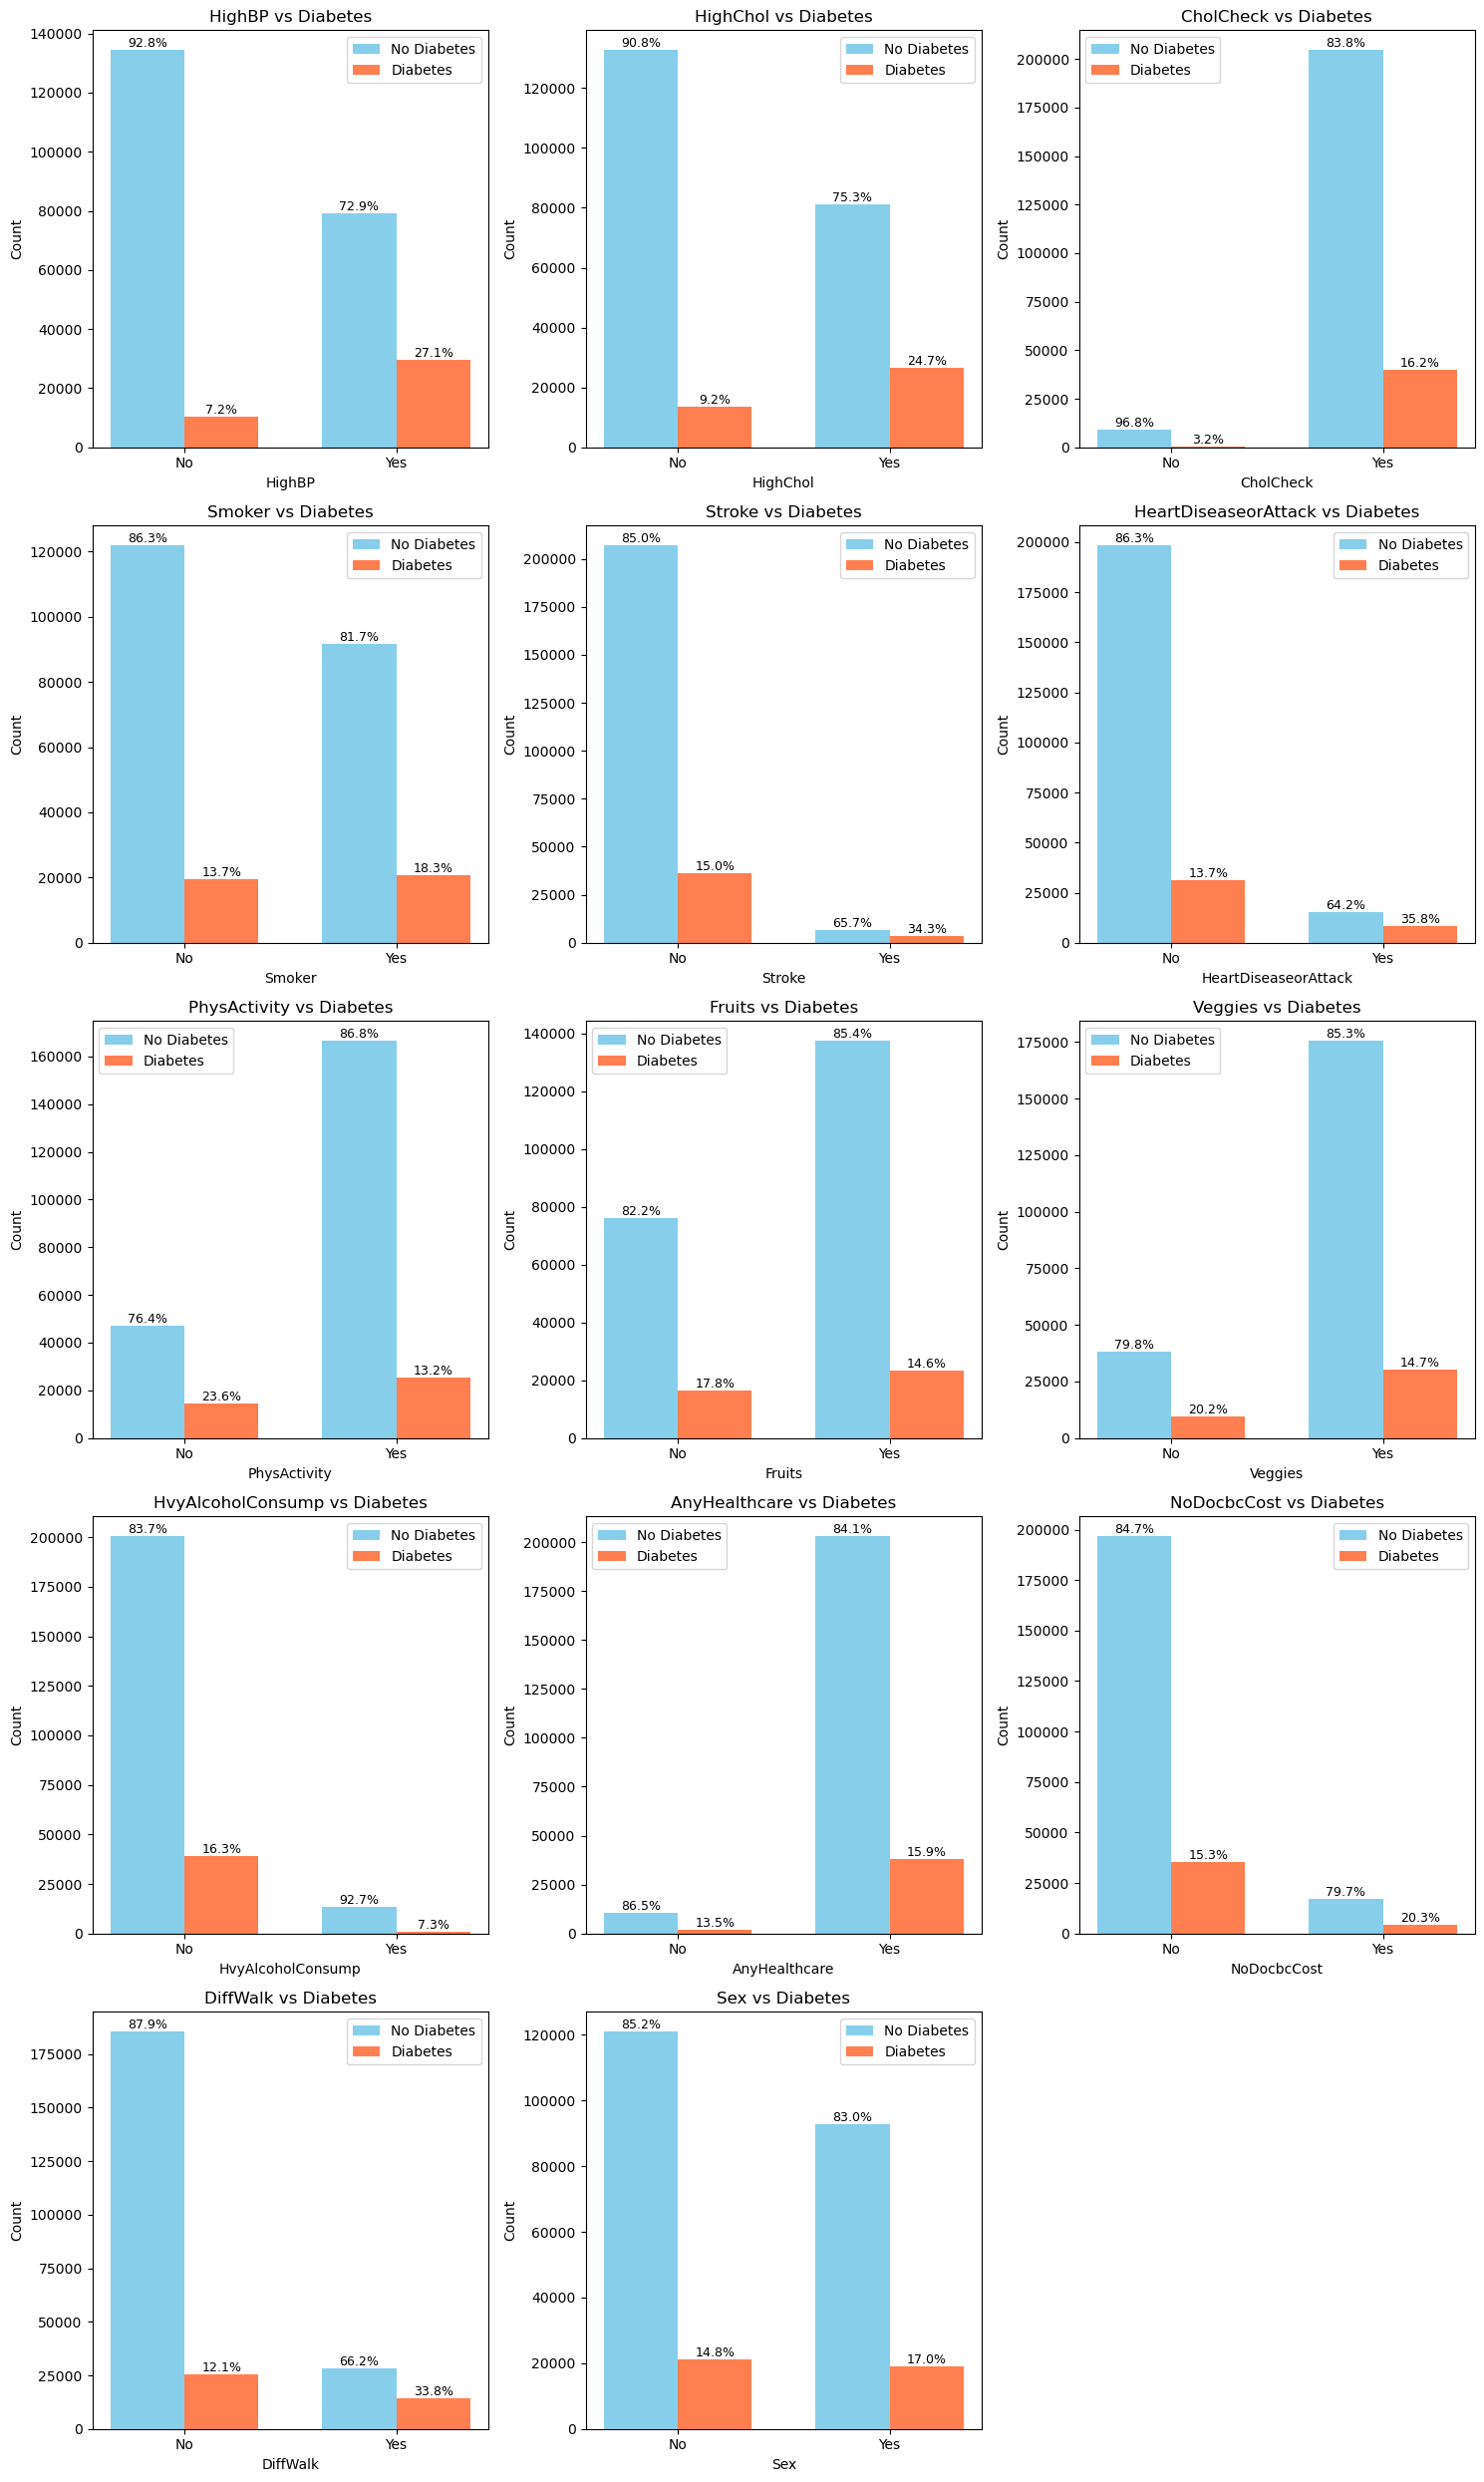

In [25]:
plot_binary_feature_analysis(df, binary_columns, target='Diabetes')

Observations:

* Of those who had HighBP or HighChol, a greater percentage of those people had diabetes, which makes sense.

* For stroke and heartdisease, if yes, there is a larger percentage of those with diabetes. 

* For difficulty walking, if yes, there is a larger percentage of those with diabetes

* For smoking, those who smoke and had diabetes vs not is more evenly balanced, which could indicated Smoker is a weaker predictor for diabetes. 

* For fruits and veggies, those who had fruit or veggies and had diabetes vs not is more evenly balanced, which could indicated Fruits and Veggies is a weaker predictor for diabetes.

* Interestingly, those who were not a heavy alcohol consumer, a greater proportion of those had diabetes, as compared to those who were a heavy alcohol consumer.

##### Additional Analysis

Group by the diabetes feature and get the mean of the binary features to obtain the percentage in the group that had 1 for the feature. 

For example for those who did not have diabetes, 37% had High blood pressure, while for those who did have diabetes, 73% of them had high blood pressure

In [26]:
diabetes_column = 'Diabetes'
diabetes_percentages = df.groupby(diabetes_column)[binary_columns].agg('mean') * 100
diabetes_percentages

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
Diabetes,,,,,,,,,,,,,,
0.0,37.113190,37.917109,95.710402,42.968044,3.162801,7.183334,77.907657,64.302326,82.143910,6.184284,94.973866,7.961049,13.228172,43.398548
1.0,73.834955,66.440703,99.242064,51.527128,8.837582,21.367286,63.609075,58.738775,75.786077,2.601496,95.807589,10.858744,36.035721,47.432274


##### Analyze the nonbinary numeric columns

Get the numeric features that are not binary

In [27]:
# Numeric columns
numeric_columns = [
    col for col in df.columns
    if df[col].nunique() != 2 and col != 'Diabetes'
]
numeric_columns

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Plot histograms overlay for diabetes and no diabetes

In [28]:
def plot_numeric_features_histogram(df, numeric_features, target='Diabetes', bins=30):
    """
    Creates overlaid histograms for non binary numeric features comparing diabetes groups
    Uses outlines only for better visibility
    """
    n_features = len(numeric_features)
    n_cols = 3
    n_rows = 3
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    axes = axes.flatten()
    
    for idx, feature in enumerate(numeric_features):
        ax = axes[idx]
        
        # Separate data by diabetes status
        no_diabetes = df[df[target] == 0][feature]
        yes_diabetes = df[df[target] == 1][feature]
        
        # Plot histograms with no fill (histtype='step' for outline only)
        ax.hist(no_diabetes, bins=bins, color='skyblue', 
                label='No Diabetes', density=True, histtype='step', linewidth=2.5)
        ax.hist(yes_diabetes, bins=bins, color='coral', 
                label='Diabetes', density=True, histtype='step', linewidth=2.5)
        
        # Styling
        ax.set_xlabel(feature, fontsize=11)
        ax.set_ylabel('Density', fontsize=11)
        ax.set_title(f'Distribution of {feature} by Diabetes Status', fontsize=12, fontweight='bold')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3, axis='y')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    # Hide empty subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

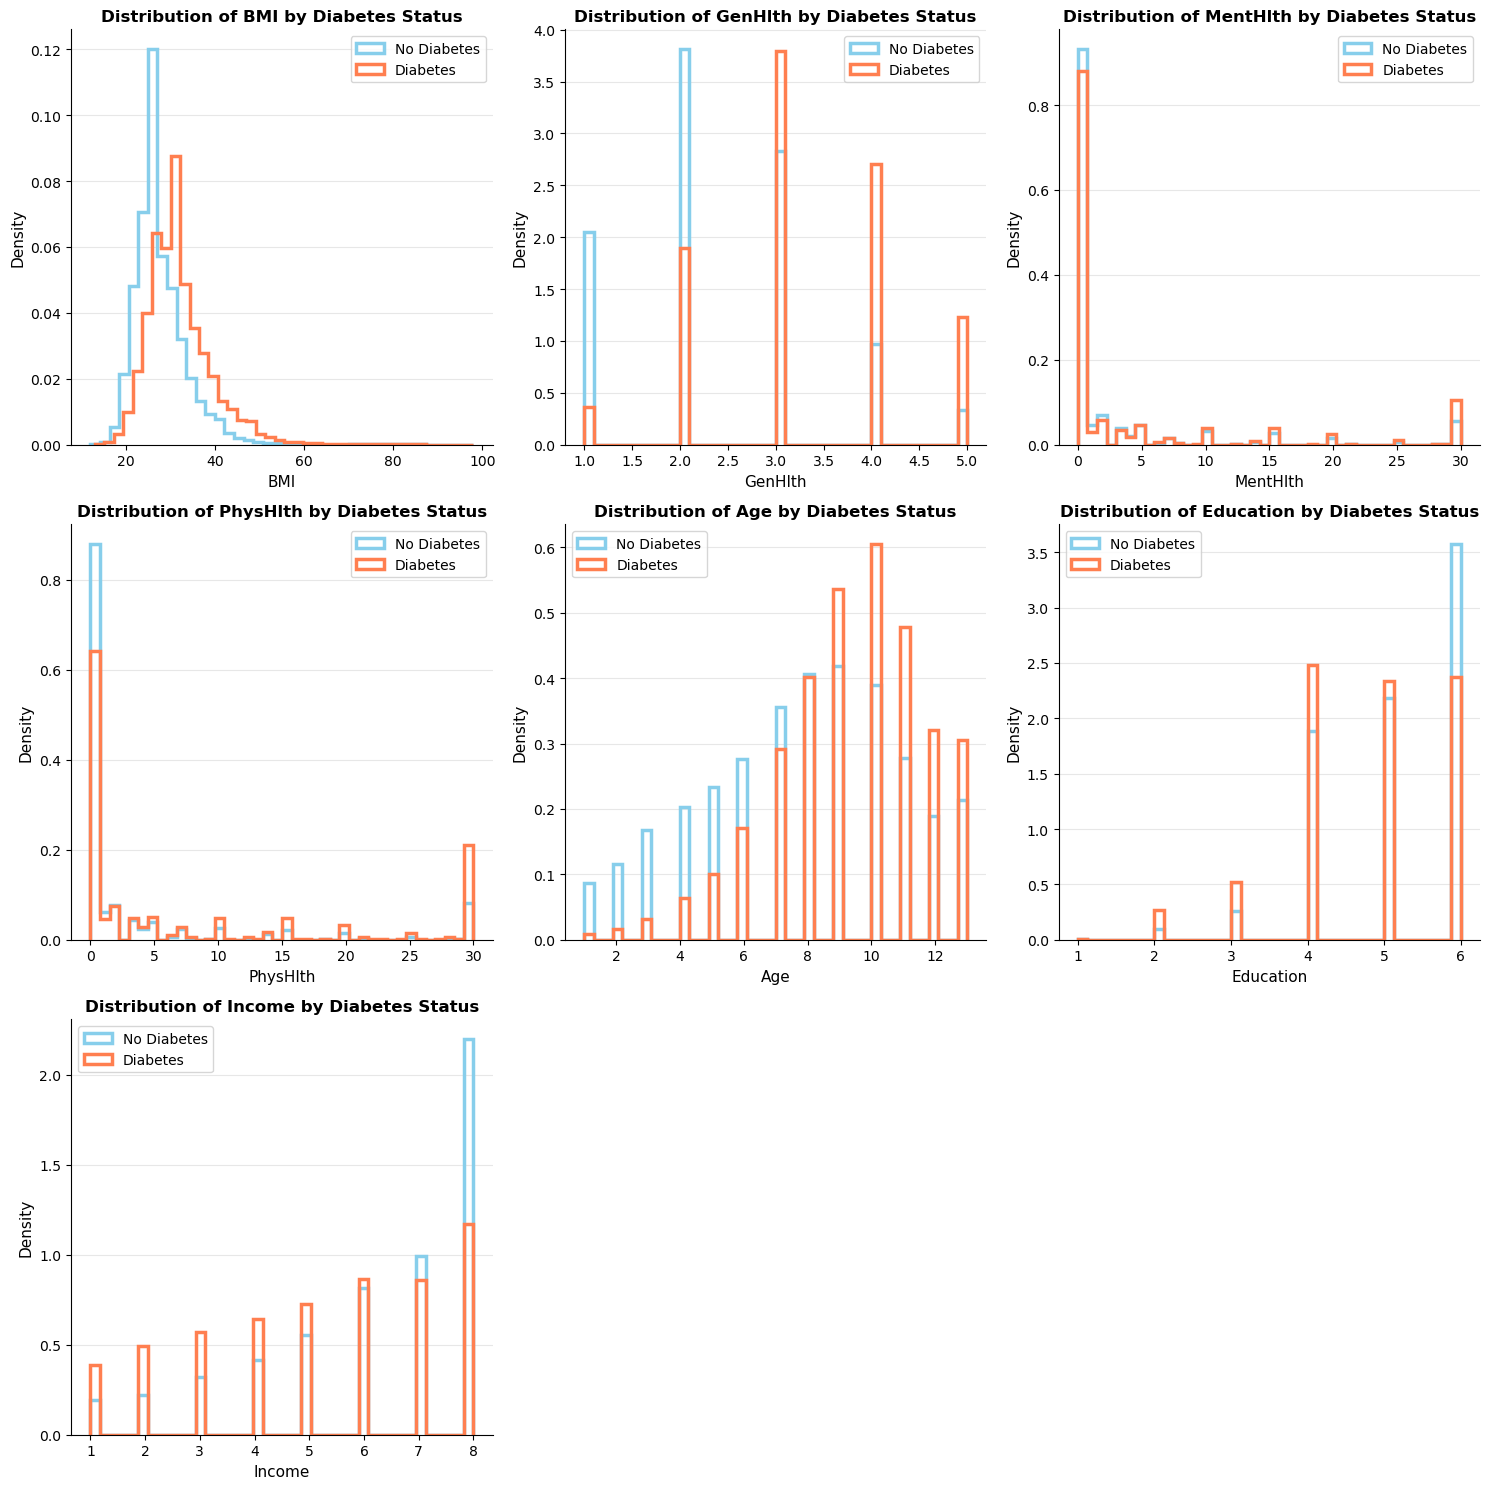

In [25]:
plot_numeric_features_histogram(df, numeric_columns, target='Diabetes', bins=40)

Observations:

* For those with diabetes, the BMI is skewed higher
* For those with diabetes, GenHealth skews higher, which makes sense (5 is poor, 1 is best)
* GenHealth and PhysHealth is relatively similarily distributed between No diabetes and diabetes with a few more in the higher range of bad days for those with diabetes
* For those with diabetes, Age skews higher, which indicates older age is more likely to have diabetes
* Also for Income, those with diabetes skews lower, indicating income is a factor

Plot to visualize the count distributions of nonbinary numeric columns

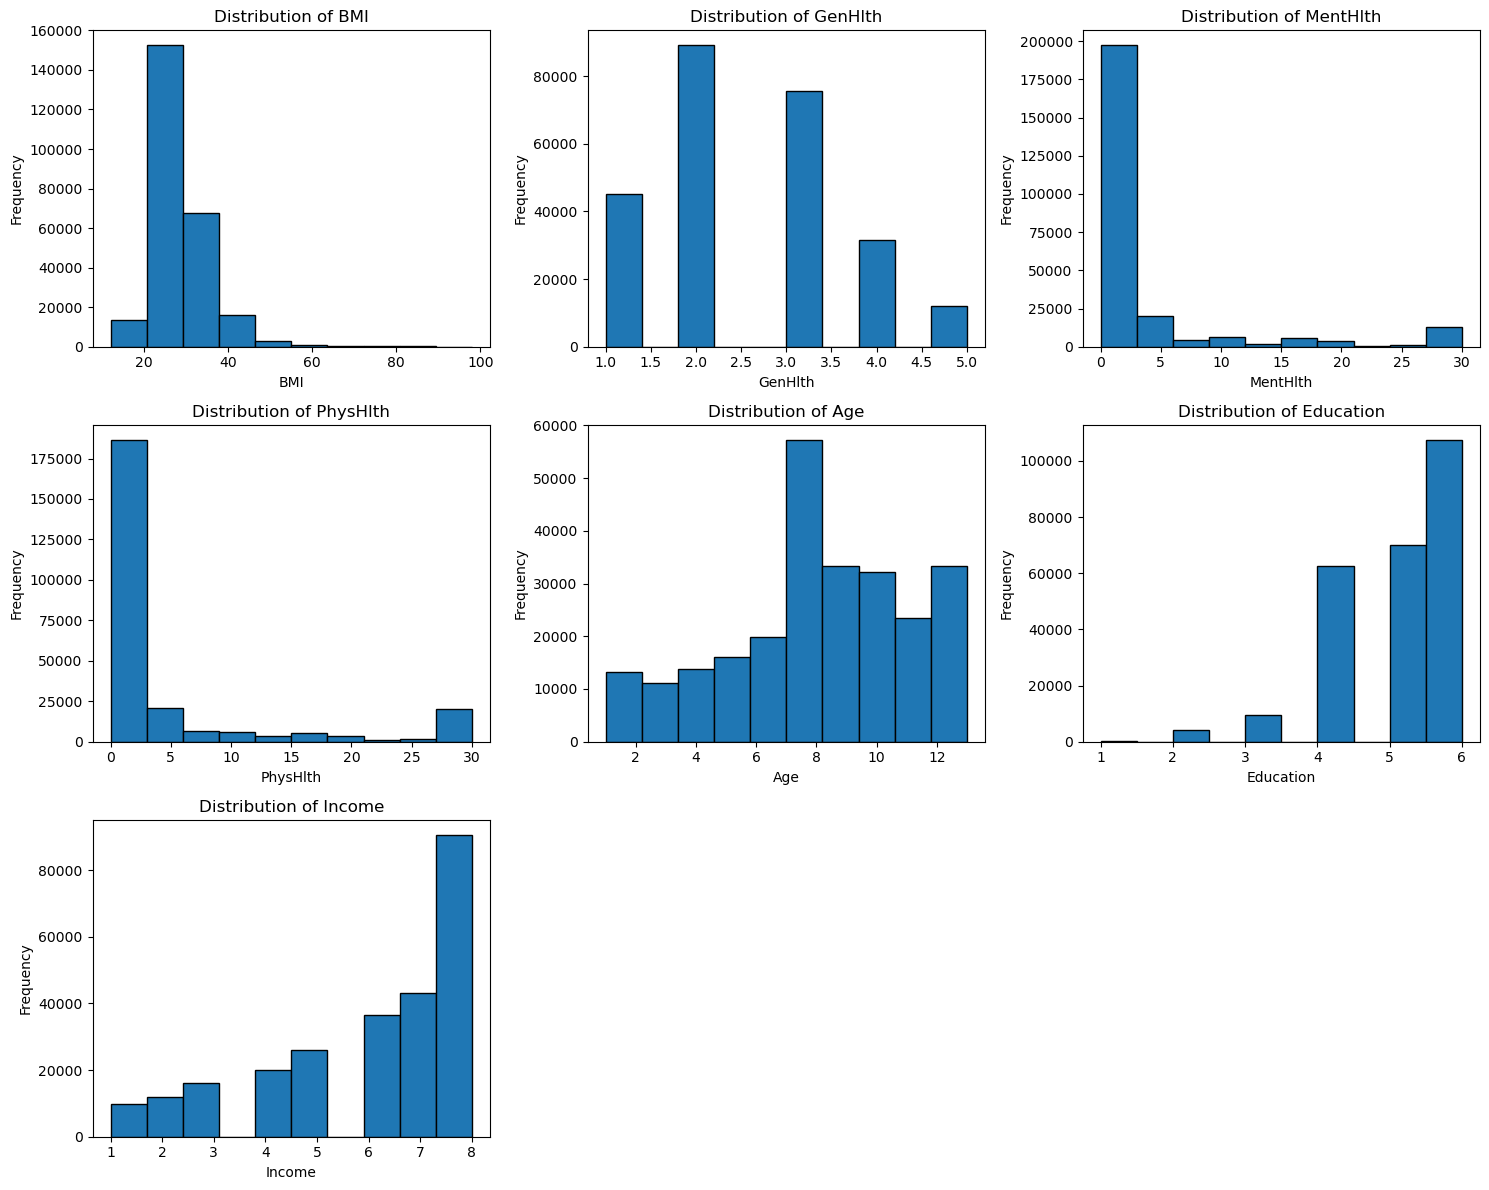

In [29]:
num_cols = len(numeric_columns)
n_cols = 3
n_rows = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if there are any
for idx in range(num_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

##### Additional Analysis

Group by the diabetes feature and get the mean of the nonbinary features

For example for those who did not have diabetes, the average BMI was 27.7, while for those who had diabetes, the average BMI was 31.8

In [30]:
diabetes_percentages = df.groupby(diabetes_column)[numeric_columns].mean()
diabetes_percentages

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
Diabetes,,,,,,,
0.0,27.742521,2.372391,2.944404,3.582416,7.786559,5.106629,6.208663
1.0,31.802737,3.254446,4.469695,7.768417,9.344798,4.750031,5.226430


##### Split the data into training and test sets for further analysis

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)

Save X_test and y_test as csv

In [32]:
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

Find the Outliers using IQR only on non binary features
* IQR is Interquartile Range and is found by subtracting Q1 (25th percentile) from Q3 (75th percentile).
* The lower fence is calculated by Q1 - (1.5*IQR)
* The upper fence is calculated by Q3 + (1.5*IQR)

* Any points below lower fence or above upper fence is considered outlier

In [34]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("q1:", Q1, "q3:", Q3, "IQR:", IQR, "lower_bound:", lower_bound, "upper_bound:", upper_bound)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for i in numeric_columns:
    print(i, ":", len(find_outliers_iqr(train_df[i])))

q1: 24.0 q3: 31.0 IQR: 7.0 lower_bound: 13.5 upper_bound: 41.5
BMI : 7823
q1: 2.0 q3: 3.0 IQR: 1.0 lower_bound: 0.5 upper_bound: 4.5
GenHlth : 9664
q1: 0.0 q3: 2.0 IQR: 2.0 lower_bound: -3.0 upper_bound: 5.0
MentHlth : 29038
q1: 0.0 q3: 3.0 IQR: 3.0 lower_bound: -4.5 upper_bound: 7.5
PhysHlth : 32866
q1: 6.0 q3: 10.0 IQR: 4.0 lower_bound: 0.0 upper_bound: 16.0
Age : 0
q1: 4.0 q3: 6.0 IQR: 2.0 lower_bound: 1.0 upper_bound: 9.0
Education : 0
q1: 5.0 q3: 8.0 IQR: 3.0 lower_bound: 0.5 upper_bound: 12.5
Income : 0


Observe value counts of numeric columns

In [30]:
for k in numeric_columns:
    print(X_train[k].value_counts())

BMI
27.0    19673
26.0    16520
24.0    15639
25.0    13651
28.0    13301
        ...  
86.0        1
83.0        1
85.0        1
96.0        1
91.0        1
Name: count, Length: 82, dtype: int64
GenHlth
2.0    71249
3.0    60584
1.0    36199
4.0    25248
5.0     9664
Name: count, dtype: int64
MentHlth
0.0     140499
2.0      10476
30.0      9726
5.0       7212
1.0       6843
3.0       5870
10.0      5086
15.0      4384
4.0       3006
20.0      2675
7.0       2500
25.0       960
14.0       953
6.0        801
8.0        508
12.0       312
28.0       263
21.0       190
29.0       118
18.0        78
9.0         73
16.0        68
27.0        65
22.0        55
17.0        45
26.0        42
11.0        36
13.0        33
23.0        32
24.0        25
19.0        10
Name: count, dtype: int64
PhysHlth
0.0     127967
30.0     15514
2.0      11794
1.0       9098
3.0       6795
5.0       6176
10.0      4512
15.0      3955
7.0       3622
4.0       3598
20.0      2650
14.0      2063
25.0      1075
6

There are outliers with the IQR method, but none of the features have a large enough range of values to be excluded. BMI has a greater range, from 12 to 98, but I decide not to exclude outliers for it because those outlier BMI values are possible and could be representative of the population.

Observe range of BMI values

In [35]:
train_df['BMI'].value_counts().sort_index()

BMI
12.0      5
13.0     16
14.0     32
15.0    112
16.0    269
       ... 
91.0      1
92.0     25
95.0      9
96.0      1
98.0      6
Name: count, Length: 82, dtype: int64

##### Next, Observe correlation between features

Using pearson correlation to create heatmap

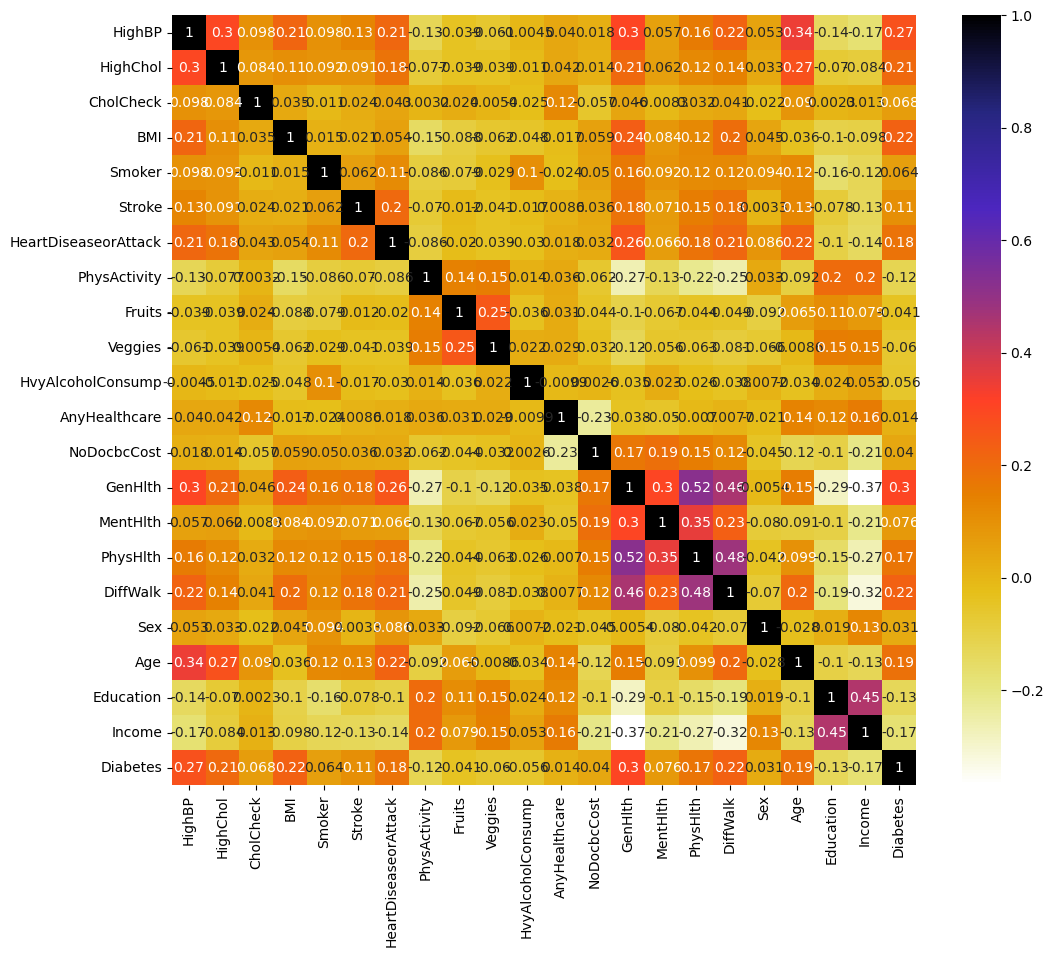

In [36]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Create the correlation matrix

In [37]:
train_df.corr()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
HighBP,1.000000,0.297478,0.098030,0.214194,0.097624,0.129690,0.209806,-0.125568,-0.038870,-0.061417,-0.004543,0.039682,0.017898,0.299930,0.056837,0.160288,0.223178,0.052827,0.344074,-0.141898,-0.171990,0.269400
HighChol,0.297478,1.000000,0.083665,0.105823,0.091691,0.091229,0.179990,-0.077380,-0.039430,-0.038919,-0.011224,0.042269,0.014209,0.207829,0.062459,0.121245,0.142843,0.032824,0.271406,-0.070393,-0.084441,0.207133
CholCheck,0.098030,0.083665,1.000000,0.034951,-0.010578,0.023970,0.043143,0.003187,0.023508,0.005388,-0.025118,0.118243,-0.056731,0.046387,-0.008310,0.031622,0.040849,-0.021718,0.090082,0.002312,0.012552,0.067965
BMI,0.214194,0.105823,0.034951,1.000000,0.014660,0.021156,0.053729,-0.147849,-0.087857,-0.061982,-0.048367,-0.016750,0.058715,0.238185,0.084380,0.120842,0.197325,0.044718,-0.035868,-0.103956,-0.098316,0.224732
Smoker,0.097624,0.091691,-0.010578,0.014660,1.000000,0.061839,0.114668,-0.086469,-0.079190,-0.029439,0.102742,-0.024010,0.049706,0.163077,0.091921,0.115958,0.122270,0.094211,0.121780,-0.162090,-0.124508,0.064001
Stroke,0.129690,0.091229,0.023970,0.021156,0.061839,1.000000,0.203434,-0.069505,-0.012359,-0.041136,-0.017204,0.008598,0.035575,0.179872,0.071201,0.150489,0.177488,0.003324,0.125188,-0.077748,-0.130898,0.106100
HeartDiseaseorAttack,0.209806,0.179990,0.043143,0.053729,0.114668,0.203434,1.000000,-0.086135,-0.019577,-0.039048,-0.029913,0.017633,0.031687,0.258901,0.065559,0.181748,0.212558,0.086015,0.220205,-0.099756,-0.142173,0.178507
PhysActivity,-0.125568,-0.077380,0.003187,-0.147849,-0.086469,-0.069505,-0.086135,1.000000,0.142186,0.151121,0.013549,0.035545,-0.061833,-0.265323,-0.125091,-0.217957,-0.253392,0.032810,-0.092451,0.198737,0.198590,-0.121259
Fruits,-0.038870,-0.039430,0.023508,-0.087857,-0.079190,-0.012359,-0.019577,0.142186,1.000000,0.254964,-0.036208,0.031023,-0.043893,-0.103200,-0.067136,-0.044146,-0.048782,-0.092034,0.065073,0.108648,0.078904,-0.040966
Veggies,-0.061417,-0.038919,0.005388,-0.061982,-0.029439,-0.041136,-0.039048,0.151121,0.254964,1.000000,0.021736,0.028804,-0.032429,-0.123803,-0.056199,-0.063088,-0.080615,-0.065517,-0.008588,0.153326,0.149123,-0.060009


Observation: No appearance of any features strongly correlated with each other

The following function we can select highly correlated features


In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in the absolute coefficient value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Observe any features with threshold of 0.7 or greater

In [40]:
corr_features = correlation(train_df, 0.7)
len(set(corr_features))

0

Observation: even at 0.7 threshold, there are no highly correlated features

Use Mutual Information classification
It quantifies the amount of information gained about the dependent var by observing each feature

In [41]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=42)
mutual_info

array([5.13287295e-02, 3.62522232e-02, 3.79440635e-02, 3.04531017e-02,
       2.00853471e-02, 5.31634423e-03, 1.51052689e-02, 4.06875284e-02,
       3.27024899e-02, 3.32757355e-02, 2.86757967e-03, 3.90586660e-02,
       7.80349690e-05, 5.08734015e-02, 3.56669737e-03, 1.35289871e-02,
       2.23369672e-02, 2.02702394e-02, 2.54138204e-02, 2.10840983e-02,
       2.18304075e-02])

Sort by greatest to least

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

HighBP                  0.051329
GenHlth                 0.050873
PhysActivity            0.040688
AnyHealthcare           0.039059
CholCheck               0.037944
HighChol                0.036252
Veggies                 0.033276
Fruits                  0.032702
BMI                     0.030453
Age                     0.025414
DiffWalk                0.022337
Income                  0.021830
Education               0.021084
Sex                     0.020270
Smoker                  0.020085
HeartDiseaseorAttack    0.015105
PhysHlth                0.013529
Stroke                  0.005316
MentHlth                0.003567
HvyAlcoholConsump       0.002868
NoDocbcCost             0.000078
dtype: float64

Decide to drop the features close to 0

Drop the features below 0.001 mutual info

In [ ]:
X_train = X_train.drop(['MentHlth', 'NoDocbcCost', 'CholCheck', 'Sex'], axis=1)

Do the same for X_test

In [39]:
columns_to_drop_from_X_test = X_test.columns.difference(X_train.columns)

X_test.drop(columns=columns_to_drop_from_X_test,axis=1, inplace=True)

In [40]:
X_train.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income'],
      dtype='object')

In [41]:
X_train.shape

(202944, 17)

Output unscaled and unbalanced data for training

In [43]:
X_train.to_csv('data/unscaled_unbalanced_X_train.csv', index=False)

Scale features to test against unscaled.
Chose MinMaxScaler instead of standard scaler since features have fixed start and end and most are binary

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_train.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.093023,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.25,0.000000,0.0,0.916667,1.0,1.000000
1,0.0,0.0,0.255814,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.50,0.000000,0.0,0.583333,0.8,1.000000
2,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.25,0.166667,0.0,0.916667,0.8,0.714286
3,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.00,0.000000,0.0,0.333333,1.0,0.857143
4,0.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.50,0.000000,1.0,0.916667,0.6,0.714286


Save the scaled unbalanced data as csv for training

In [46]:
scaled_X_train.to_csv('data/scaled_unbalanced_X_train.csv', index=False)

Also save y_train to csv

In [ ]:
y_train.to_csv('data/y_train.csv', index=False)

Examine the unbalanced dataset

In [48]:
y_train.value_counts()

Diabetes
0.0    170908
1.0     32036
Name: count, dtype: int64

Examine duplicate rows again for 0 and 1

In [49]:
train_df = pd.concat([X_train, y_train], axis=1)
duplicated = train_df[train_df.duplicated()]
duplicated

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes
106869,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.0,6.0,8.0,0.0
131269,0.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,6.0,8.0,0.0
47559,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,5.0,8.0,0.0
249071,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,4.0,6.0,8.0,0.0
190059,0.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,7.0,6.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112727,0.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,8.0,4.0,8.0,0.0
87498,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,8.0,6.0,8.0,0.0
168266,0.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,4.0,5.0,7.0,0.0
103694,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,11.0,6.0,7.0,0.0


In [50]:
duplicated[duplicated['Diabetes'] == 1]

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes
109706,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,12.0,6.0,8.0,1.0
156607,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,9.0,6.0,8.0,1.0
231299,1.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,9.0,6.0,8.0,1.0
13938,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,10.0,6.0,8.0,1.0
234914,0.0,0.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,11.0,6.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82986,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,9.0,6.0,8.0,1.0
136967,1.0,0.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,10.0,4.0,5.0,1.0
119121,1.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,9.0,6.0,5.0,1.0
20932,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,10.0,6.0,8.0,1.0


In [51]:
duplicated[duplicated['Diabetes'] == 0]

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes
106869,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.0,6.0,8.0,0.0
131269,0.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,6.0,8.0,0.0
47559,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,5.0,8.0,0.0
249071,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,4.0,6.0,8.0,0.0
190059,0.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,7.0,6.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112727,0.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,8.0,4.0,8.0,0.0
87498,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,8.0,6.0,8.0,0.0
168266,0.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,4.0,5.0,7.0,0.0
103694,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,11.0,6.0,7.0,0.0


Decide to do undersample of Majority class and Oversample using SMOTE (Synthetic Minority Oversampling Technique) of minority class on the scaled data

Since around 170000 for majority class and around 32000 for minority, decide to under and oversample both to 100000 rows for each class

In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy={1: 100000}, random_state=42)
scaled_X_resampled_smote, y_resampled_smote = smote.fit_resample(scaled_X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy={0: 100000}, random_state=42)
scaled_X_resampled_final, y_resampled_final = undersampler.fit_resample(scaled_X_resampled_smote, y_resampled_smote)

print(f"Original dataset shape: {scaled_X_train.shape}")
print(f"Resampled dataset shape: {scaled_X_resampled_final.shape}")
print(f"Class distribution after undersampling:\n{pd.Series(y_resampled_final).value_counts()}")

Original dataset shape: (202944, 17)
Resampled dataset shape: (200000, 17)
Class distribution after undersampling:
Diabetes
0.0    100000
1.0    100000
Name: count, dtype: int64


Save the resampled dataset for training

In [54]:
# Save the data
scaled_X_resampled_final.to_csv("data/scaled_balanced_X_train.csv", index=False)
y_resampled_final.to_csv("data/scaled_balanced_y_train.csv", index=False)

Also do the same resampling technique on the unscaled dataset for testing

In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy={1: 100000}, random_state=42)
unscaled_X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy={0: 100000}, random_state=42)
unscaled_X_resampled_final, y_resampled_final = undersampler.fit_resample(unscaled_X_resampled_smote, y_resampled_smote)

print(f"Original dataset shape: {X_train.shape}")
print(f"Resampled dataset shape: {unscaled_X_resampled_final.shape}")
print(f"Class distribution after undersampling:\n{pd.Series(y_resampled_final).value_counts()}")

Original dataset shape: (202944, 17)
Resampled dataset shape: (200000, 17)
Class distribution after undersampling:
Diabetes
0.0    100000
1.0    100000
Name: count, dtype: int64


Save the unscaled and balanced data for training

In [56]:
unscaled_X_resampled_final.to_csv("data/unscaled_balanced_X_train.csv", index=False)
y_resampled_final.to_csv("data/unscaled_balanced_y_train.csv", index=False)